In [44]:
# Import Library
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load the data from CSV
data = pd.read_csv('expenses.csv')
data.head()

,input,output
0,Pizza Hut,Food
1,McDonald's,Food
2,Burger King,Food
3,Subway,Food
4,KFC,Food


In [46]:
# Check the size of the dataset
print(f"Dataset size: {len(data)}\n")

# Check the data types of the columns
print(f"Data types:\n{data.dtypes}\n")

# Check for missing values
print(f"Missing values:\n{data.isnull().sum()}\n")

# Check the summary statistics of the dataset
print(f"Summary statistics:\n{data.describe()}\n")


Dataset size: 361

Data types:
input     object
output    object
dtype: object

Missing values:
input     0
output    0
dtype: int64

Summary statistics:
            input output
count         361    361
unique        361     17
top     Pizza Hut   Food
freq            1     46



<Figure size 800x600 with 0 Axes>

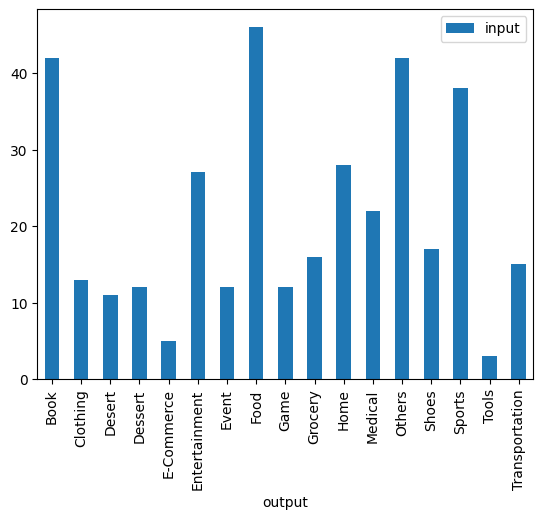

In [47]:
# Distribution Graph
data = pd.read_csv('expenses.csv')

fig = plt.figure(figsize=(8,6))
data.groupby('output').count().plot.bar(ylim=0)
plt.show()

In [48]:
# Transform the output column to numerical values
data['category_id'] = data['output'].factorize()[0]
category_id_df = data[['output', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'output']].values)
data

,input,output,category_id
0,Pizza Hut,Food,0
1,McDonald's,Food,0
2,Burger King,Food,0
3,Subway,Food,0
4,KFC,Food,0
...,...,...,...
356,Guest House,Others,16
357,B&B,Others,16
358,Fujifilm,Others,16
359,Canon,Others,16


In [49]:
tfidf = TfidfVectorizer(sublinear_tf=True, stop_words='english')
features = tfidf.fit_transform(data['input']).toarray()
labels = data['category_id']
features.shape

(361, 442)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\USER\AppData\Loca

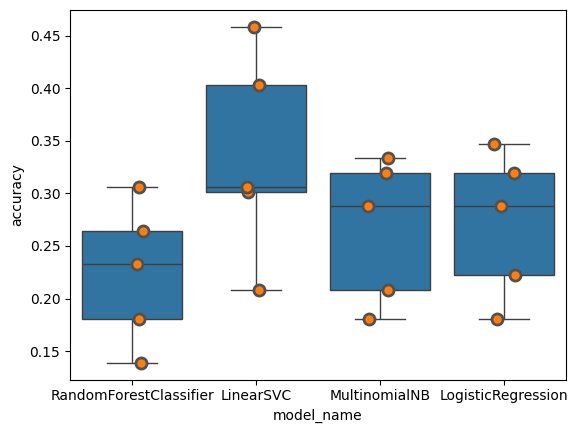

In [51]:
# Build different models
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Visualize the cross-validation results
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [52]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                0.34
LogisticRegression       0.27
MultinomialNB            0.27
RandomForestClassifier   0.22
Name: accuracy, dtype: float64

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


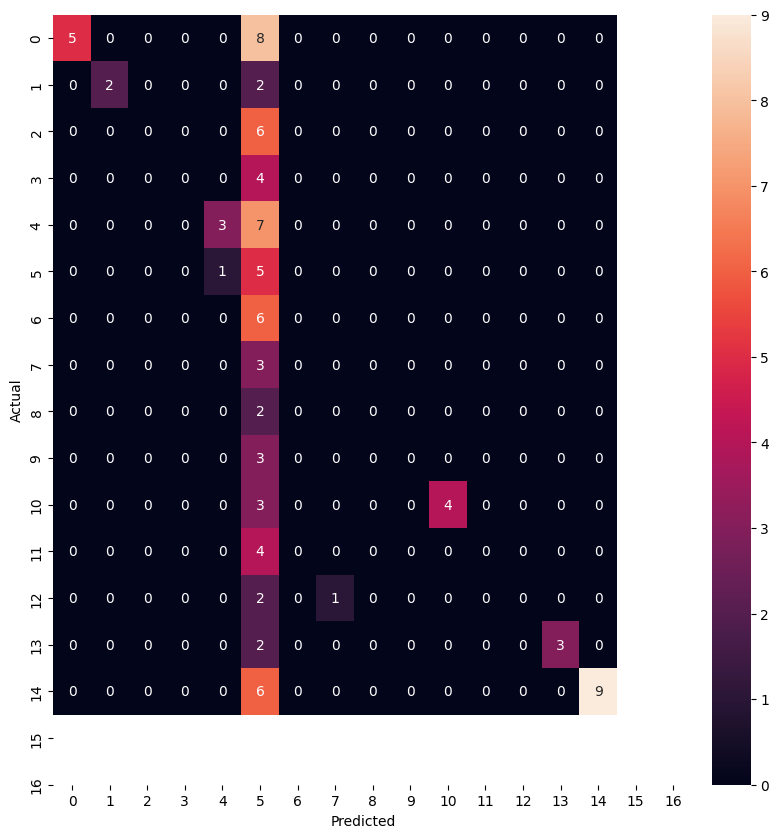

In [53]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category_id.values, yticklabels=category_id_df.category_id.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [54]:
print(classification_report(y_test, y_pred, labels=data['category_id'].unique(), target_names=data['output'].unique()))


                precision    recall  f1-score   support

          Food       1.00      0.38      0.56        13
       Grocery       1.00      0.50      0.67         4
Transportation       0.00      0.00      0.00         6
      Clothing       0.00      0.00      0.00         4
 Entertainment       0.75      0.30      0.43        10
        Sports       0.08      0.83      0.14         6
          Home       0.00      0.00      0.00         6
    E-Commerce       0.00      0.00      0.00         0
         Tools       0.00      0.00      0.00         0
         Event       0.00      0.00      0.00         3
       Dessert       0.00      0.00      0.00         2
        Desert       0.00      0.00      0.00         3
          Book       1.00      0.57      0.73         7
         Shoes       0.00      0.00      0.00         4
          Game       0.00      0.00      0.00         3
       Medical       1.00      0.60      0.75         5
        Others       1.00      0.60      0.75  

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [55]:
# Load test data and make predictions
test_data = pd.read_csv('expenses.csv')
test_data_tfidf = tfidf.transform(test_data['input']).toarray()
test_data['predicted_id'] = model.predict(test_data_tfidf)
test_data['predicted'] = test_data['predicted_id'].map(id_to_category)

# Display the test data with predictions
pd.options.display.float_format = '{:,.2f}'.format
print(test_data[['input', 'output', 'predicted']])

           input  output predicted
0      Pizza Hut    Food      Food
1     McDonald's    Food      Food
2    Burger King    Food      Food
3         Subway    Food    Sports
4            KFC    Food      Food
..           ...     ...       ...
356  Guest House  Others    Others
357          B&B  Others    Sports
358     Fujifilm  Others    Others
359        Canon  Others    Sports
360        Nikon  Others    Others

[361 rows x 3 columns]


In [56]:
# Give the model a test with sample input
sample_input = ["Caring", "Foods", "Grab", "Mamak", "McDonalds", "Petrol", "Shell", "Shopping", "Transport", "Uber"]
sample_input_tfidf = tfidf.transform(sample_input)
sample_output = model.predict(sample_input_tfidf)

# Display the output which match back category name
sample_output_name = id_to_category[sample_output[0]]

for i in range(len(sample_output)):
    sample_output_name = id_to_category[sample_output[i]]
    print(f"Predicted category for '{sample_input[i]}' is '{sample_output_name}'")    

Predicted category for 'Caring' is 'Medical'
Predicted category for 'Foods' is 'Sports'
Predicted category for 'Grab' is 'Transportation'
Predicted category for 'Mamak' is 'Food'
Predicted category for 'McDonalds' is 'Sports'
Predicted category for 'Petrol' is 'Transportation'
Predicted category for 'Shell' is 'Sports'
Predicted category for 'Shopping' is 'Sports'
Predicted category for 'Transport' is 'Sports'
Predicted category for 'Uber' is 'Transportation'
